# Import libraries

In [83]:
#Import libraries
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [85]:
# Loading dataset into data_set variable
data_set = pd.read_csv('./Data/vehicle_data.csv')

In [84]:
# Previewing data set column and row count
data_set.shape

(123971, 19)

In [86]:
# Preview data
data_set.head(5)

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00


In [87]:
#Get summery of the data
data_set.describe()

,Year
count,123971.000000
mean,2008.409765
std,25.330835
min,0.000000
25%,2004.000000
50%,2013.000000
75%,2016.000000
max,2561.000000


In [88]:
# Check null values count
data_set.isnull().sum()

Title                 0
Sub_title             0
Price                 0
Brand                 0
Model                 1
Edition           76433
Year                  0
Condition             0
Transmission          1
Body               5095
Fuel                  0
Capacity            205
Mileage               0
Location              0
Description       16174
Post_URL              0
Seller_name          98
Seller_type           0
published_date        0
dtype: int64

# Preprocess the dataset 

In [89]:
# Select only SUV and SUV/4x4 from 'Body' column
SUV = data_set[(data_set['Body'] == 'SUV') | (data_set['Body'] == 'SUV / 4x4')]

Feature selection

In [90]:
# Drop unwanted columns for price prediction

SUV = SUV.drop(['Sub_title','Location','Post_URL','Seller_type','published_date','Body','Seller_name','Edition','Description','Condition','Title'], axis = 'columns')

In [91]:
# View data after drop columns
SUV.head(15)

,Price,Brand,Model,Year,Transmission,Fuel,Capacity,Mileage
0,"Rs 12,900,000",Honda,Vezel,2017,Automatic,Hybrid,"1,500 cc","37,000 km"
2,"Rs 17,000,000",Toyota,CHR,2020,Automatic,Petrol,"1,200 cc","15,000 km"
3,"Rs 13,000,000",Toyota,CHR,2017,Automatic,Petrol,"1,200 cc","21,000 km"
4,"Rs 33,500,000",Toyota,Land Cruiser Prado,2015,Automatic,Petrol,"2,700 cc","57,000 km"
5,"Rs 14,900,000",Toyota,Land Cruiser Prado,2007,Automatic,Petrol,"2,700 cc","120,000 km"
6,"Rs 19,100,000",Honda,CRV,2018,Automatic,Petrol,"1,500 cc","37,134 km"
9,"Rs 9,200,000",MG,ZS,2018,Automatic,Petrol,"1,000 cc","60,000 km"
11,"Rs 19,990,000",Mitsubishi,Montero,2013,Automatic,Diesel,"3,200 cc","110,000 km"
13,"Rs 12,400,000",Toyota,CHR,2017,Automatic,Petrol,"1,200 cc","37,000 km"
21,"Rs 20,800,000",Toyota,Harrier,2015,Automatic,Hybrid,"2,500 cc","92,000 km"


In [92]:
# View the data types in columns
SUV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16224 entries, 0 to 123961
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         16224 non-null  object
 1   Brand         16224 non-null  object
 2   Model         16224 non-null  object
 3   Year          16224 non-null  int64 
 4   Transmission  16224 non-null  object
 5   Fuel          16224 non-null  object
 6   Capacity      16224 non-null  object
 7   Mileage       16224 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


In [93]:
# Replace non numeric characters in 'Price' column

SUV['Price'] =SUV['Price'].str.replace('Rs.','')
SUV['Price'] =SUV['Price'].str.replace(',','')

In [94]:
# Convert to numeric values
SUV['Price'] = pd.to_numeric(SUV['Price'], errors='coerce')

# Remove rows with NaN values for 'Price' column
SUV.dropna(subset=['Price'], inplace=True)

SUV['Price'] = SUV['Price'].astype('int64')

In [95]:
# Remove non-numeric values in 'Capacity' column

SUV['Capacity'] =SUV['Capacity'].str.replace('[^0-9]', '')

In [96]:
# Convert to numeric values
SUV['Capacity'] = pd.to_numeric(SUV['Capacity'], errors='coerce')

# Remove rows with NaN values for 'Capacity' column
SUV.dropna(subset=['Capacity'], inplace=True)
SUV['Capacity'] = SUV['Capacity'].astype('int64')

In [97]:
#Remove records less than 990 and more than 6000 from capacity column

SUV=SUV[(SUV['Capacity'] >= 990) & (SUV['Capacity'] <= 6000)]

In [98]:
# Replace non numeric characters in 'Mileage' column

SUV['Mileage'] =SUV['Mileage'].str.replace('km','')
SUV['Mileage'] =SUV['Mileage'].str.replace(',','')

In [99]:
# Convert to numeric values
SUV['Mileage'] = pd.to_numeric(SUV['Mileage'], errors='coerce')

# Remove rows with NaN values for 'Mileage' column
SUV.dropna(subset=['Mileage'], inplace=True)

SUV['Mileage'] = SUV['Mileage'].astype('int64')

In [100]:
# Remove possible error values
values_to_remove = [12345,11111]

# Remove rows with specific values in 'Mileage' column
SUV = SUV[~SUV['Mileage'].isin(values_to_remove)]

# Remove rows with values greater than 500000 and less than 10000 in 'Mileage' column
SUV= SUV[SUV['Mileage'] <= 500000]
SUV = SUV[SUV['Mileage'] >= 10000]

In [101]:
# View unique brands that are available in the data set
SUV['Brand'].unique()

array(['Honda', 'Toyota', 'MG', 'Mitsubishi', 'Land Rover', 'Lexus',
       'BMW', 'Kia', 'Peugeot', 'Ford', 'Micro', 'Nissan', 'Suzuki',
       'Hyundai', 'Audi', 'Zotye', 'Mahindra', 'Mercedes Benz', 'Jeep',
       'Ssang Yong', 'Hummer', 'Isuzu', 'Daihatsu', 'Porsche',
       'Volkswagen', 'DFSK', 'Jaguar', 'Mazda', 'Tata', 'Morris',
       'Subaru', 'Other brand', 'Volvo', 'Rover', 'Chevrolet', 'Datsun',
       'Perodua', 'Chery', 'Mini', 'Fiat', 'Opel', 'Aston Martin', 'SEAT',
       'Austin', 'Ssangyong', 'Land-Rover', 'Range-Rover',
       'Mercedes-Benz', 'Other', 'Aston', 'CAT'], dtype=object)

In [102]:
# Categorize the same brand into one category
SUV['Brand'] =SUV['Brand'].str.replace('Range-Rover','Land Rover')
SUV['Brand'] =SUV['Brand'].str.replace('Land-Rover','Land Rover')
SUV['Brand'] =SUV['Brand'].str.replace('Mercedes-Benz','Mercedes Benz')
SUV['Brand'] =SUV['Brand'].str.replace('Ssangyong','Ssang Yong')

In [103]:
# Get different brand counts
brand_counts = SUV['Brand'].value_counts()

# Get the brands with at least 10 records
brands_to_keep = brand_counts[brand_counts >= 10].index

# Filter the DataFrame to only include rows with brands to keep
SUV = SUV[SUV['Brand'].isin(brands_to_keep)]

# Rename all brands which have less than 70 records, as 'Other brand'
SUV['Brand'] = SUV['Brand'].replace(brand_counts[brand_counts < 70].index, 'Other Brand')

In [104]:
# Identify the unique values in 'Brand' column
SUV['Brand'].value_counts()

Toyota           4066
Mitsubishi       2401
Honda            2015
Land Rover       1004
Nissan            958
Kia               655
BMW               472
Hyundai           387
Micro             385
Other Brand       295
Audi              254
Suzuki            225
MG                214
Peugeot           164
Ssang Yong        150
Daihatsu          135
Ford              134
Mercedes Benz     111
Jeep               84
Tata               80
Isuzu              73
Mahindra           72
DFSK               70
Name: Brand, dtype: int64

In [106]:
# Further categorize the brand

SUV.loc[SUV['Brand'].str.contains('Daihatsu|Isuzu|Suzuki'), 'Brand'] = 'Other Japanese'
SUV.loc[SUV['Brand'].str.contains('Audi|MG|Jeep|Ford|Peugeot'), 'Brand'] = 'Other Europe'
SUV.loc[SUV['Brand'].str.contains('Kia|Ssang Yong'), 'Brand'] = 'Other Korean'
SUV.loc[SUV['Brand'].str.contains('DFSK|Mahindra|Tata'), 'Brand'] = 'Indian'

In [105]:
# Categorize the models 
SUV.loc[SUV['Brand'] == 'Other Brand', 'Model'] = 'Other Model'
SUV.loc[SUV['Brand'] == 'Other Japanese', 'Model'] = 'Other Japanese'
SUV.loc[SUV['Brand'] == 'Other Europe', 'Model'] = 'Other Europe'
SUV.loc[SUV['Brand'] == 'Other Korean', 'Model'] = 'Other Korean'
SUV.loc[SUV['Brand'] == 'Indian', 'Model'] = 'Indian'

In [107]:
#Identify unique "Models" that available
SUV['Model'].unique()

array(['Vezel', 'CHR', 'Land Cruiser Prado', 'CRV', 'ZS', 'Montero',
       'Harrier', 'Discovery', 'Defender', 'Raize', 'Other Model', 'X5',
       'X2', 'Range Rover Sport', 'Sorento', 'Range Rover', 'Hilux',
       '5008', 'Outlander', 'Ranger', 'Rexton', 'Escudo', 'X-Trail',
       'Tucson', 'Vitara', 'Shogun', 'Cami', 'Q3', 'Q2',
       'Land Cruiser Sahara', 'X5 M', '3008', 'Pajero', 'Sportage',
       'Ecosport', 'X3', 'Venue', 'Scorpio', 'Santa Fe', 'X1', 'Navara',
       'Starlet', 'Rush', 'Eclipse Cross', 'GLE 300D', 'Grand Cherokee',
       'Kyron', 'Korando', 'Grand Vitara', 'Q7', 'Fortuner', 'Vanguard',
       'X5 eDrive', 'Panda Cross', 'Raptor Ranger', 'Range Rover Velar',
       'Range Rover Evoque', 'GLE 500', 'RAV4', 'BAIC', 'RVR', 'Terios',
       'XBee', 'X25', 'Wrangler', 'Patrol', 'GLE 400', 'L200', 'ASX',
       'GLA 180', 'Glory', 'Cherokee', 'Range Rover PHEV', '4DR',
       'Xpander', 'Korondo', 'Freelander', 'Juke', 'Bolero', 'HR-V',
       'Qashqai', 'Discov

In [108]:
# Do the segmentation for models

SUV.loc[SUV['Model'].str.contains('Prado|PRADO|Land Cruiser|LAND CRUISER|Land cruiser'), 'Model'] = 'Land Cruiser Prado'
SUV.loc[SUV['Model'].str.contains('Vezel',case=False), 'Model'] = 'Vezel'
SUV.loc[SUV['Model'].str.contains('Montero|MONTERO|montero'), 'Model'] = 'Montero'
SUV.loc[SUV['Model'].str.contains('Defender',case=False), 'Model'] = 'Defender'
SUV.loc[SUV['Model'].str.contains('Discovery',case=False), 'Model'] = 'Discovery'
SUV.loc[SUV['Model'].str.contains('Outlander',case=False), 'Model'] = 'Outlander'
SUV.loc[SUV['Model'].str.contains('Pajero|PAJERO'), 'Model'] = 'Pajero'
SUV.loc[SUV['Model'].str.contains('Range Rover|RANGE ROVER|velar|Velar'), 'Model'] = 'Range Rover'
SUV.loc[SUV['Model'].str.contains('CHR|Chr|ChR'), 'Model'] = 'CHR'
SUV.loc[SUV['Model'].str.contains('CRV|C-RV|Crv'), 'Model'] = 'CRV'
SUV.loc[SUV['Model'].str.contains('X-Trail|X trail|X-trail|X Trail|XTrail|X TRAIL|X Trail|X-TRAIL'), 'Model'] = 'X-Trail'
SUV.loc[SUV['Model'].str.contains('X1|x1'), 'Model'] = 'X1'
SUV.loc[SUV['Model'].str.contains('X3|x3'), 'Model'] = 'X3'
SUV.loc[SUV['Model'].str.contains('X5|x5'), 'Model'] = 'X5'
SUV.loc[SUV['Model'].str.contains('Harrier',case=False), 'Model'] = 'Harrier'
SUV.loc[SUV['Model'].str.contains('4Dr|4DR|4dr|4dR'), 'Model'] = '4DR'
SUV.loc[SUV['Model'].str.contains('Eclipse',case=False), 'Model'] = 'Eclipse'
SUV.loc[SUV['Model'].str.contains('Tucson|TUCSON'), 'Model'] = 'Tucson'
SUV.loc[SUV['Model'].str.contains('Rexton|REXTON|Ssangyong|Kyron'), 'Model'] = 'Rexton'
SUV.loc[SUV['Model'].str.contains('Sorento',case=False), 'Model'] = 'Sorento'
SUV.loc[SUV['Model'].str.contains('Sportage',case=False), 'Model'] = 'Sportage'
SUV.loc[SUV['Model'].str.contains('Escudo',case=False), 'Model'] = 'Escudo'
SUV.loc[SUV['Model'].str.contains('Rush',case=False), 'Model'] = 'Rush'
SUV.loc[SUV['Model'].str.contains('Rav',case=False), 'Model'] = 'Rav'
SUV.loc[SUV['Model'].str.contains('Korando',case=False), 'Model'] = 'Korando'
SUV.loc[SUV['Model'].str.contains('Fortuner',case=False), 'Model'] = 'Fortuner'
SUV.loc[SUV['Model'].str.contains('Hrv|H-RV|HR-V|HRV',case=False), 'Model'] = 'HRV'
SUV.loc[SUV['Model'].str.contains('santa fe',case=False), 'Model'] = 'Santa Fe'
SUV.loc[SUV['Model'].str.contains('jimny',case=False), 'Model'] = 'Jimny'
SUV.loc[SUV['Model'].str.contains('jeep',case=False), 'Model'] = 'Jeep'
SUV.loc[SUV['Model'].str.contains('zs',case=False), 'Model'] = 'ZS'
SUV.loc[SUV['Model'].str.contains('juke',case=False), 'Model'] = 'Juke'
SUV.loc[SUV['Model'].str.contains('patrol',case=False), 'Model'] = 'Patrol'
SUV.loc[SUV['Model'].str.contains('raize',case=False), 'Model'] = 'Raize'
SUV.loc[SUV['Model'].str.contains('gypsy',case=False), 'Model'] = 'Gypsy'
SUV.loc[SUV['Model'].str.contains('cami',case=False), 'Model'] = 'Cami'


In [109]:
#Get the count for models
model_counts = SUV['Model'].value_counts()

# Get the model with at least 30 records
models_to_keep = model_counts[model_counts >= 30].index
print (models_to_keep)

# Filter the DataFrame to only include rows with models to keep
SUV = SUV[SUV['Model'].isin(models_to_keep)]

Index(['Land Cruiser Prado', 'Vezel', 'Montero', 'Hilux', 'CHR', 'X-Trail',
       'Range Rover', 'Other Model', 'CRV', 'Sorento', 'Outlander', 'Rexton',
       'Pajero', 'Harrier', 'Sportage', 'Discovery', 'ZS', 'X5', 'Defender',
       'Santa Fe', 'L200', 'Tucson', 'X1', 'Navara', 'Fortuner', 'Rav',
       'Terios', '5008', 'Eclipse', '4DR', 'Patrol', 'Q2', 'Rush', 'Ranger',
       'Raize', 'Grand Vitara', 'Q7', 'Freelander', 'X3', 'Q3', '3008',
       'Glory', 'Actyon', 'Vitara', 'Escudo', 'X2', 'Dutsun', 'Tivoli',
       'Wrangler', 'Xpander', 'Xenon', 'Qashqai'],
      dtype='object')


In [110]:
# Group the data by the 'Model' column and count the frequency of each model
model_count = SUV.groupby('Model')['Model'].count().sort_values(ascending=False)

print(model_count)
len(model_count)

Model
Land Cruiser Prado    1957
Vezel                 1543
Montero               1213
Hilux                  692
CHR                    612
X-Trail                572
Range Rover            520
Other Model            464
CRV                    431
Sorento                391
Outlander              372
Rexton                 318
Pajero                 316
Harrier                286
Sportage               242
Discovery              223
ZS                     214
X5                     213
Santa Fe               184
Defender               184
L200                   181
Tucson                 170
X1                     146
Navara                 130
Fortuner               123
Rav                    114
5008                   101
Terios                 101
Eclipse                100
4DR                     99
Patrol                  97
Q2                      94
Rush                    89
Ranger                  81
Raize                   77
Grand Vitara            69
Q7                    

52

In [111]:
# View the data types after changing them
SUV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13487 entries, 0 to 123961
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         13487 non-null  int64 
 1   Brand         13487 non-null  object
 2   Model         13487 non-null  object
 3   Year          13487 non-null  int64 
 4   Transmission  13487 non-null  object
 5   Fuel          13487 non-null  object
 6   Capacity      13487 non-null  int64 
 7   Mileage       13487 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 948.3+ KB


In [112]:
# Check different types and their value counts for 'Transmission' and 'Fuel' columns
SUV['Transmission'].value_counts()

Automatic             9375
Tiptronic             2063
Manual                2046
Other transmission       3
Name: Transmission, dtype: int64

In [113]:
SUV['Fuel'].value_counts()

Petrol             6308
Diesel             5416
Hybrid             1731
Other fuel type      16
Electric             14
CNG                   2
Name: Fuel, dtype: int64

In [114]:
# Do the label encoding for 'Transmission and 'Fuel' columns
transmission_l = LabelEncoder()
fuel_l = LabelEncoder()

SUV['Transmission_N'] = transmission_l.fit_transform(SUV['Transmission'])
SUV['Fuel_N'] = fuel_l.fit_transform(SUV['Fuel'])

In [115]:
# Check the correlation 
SUV.corr()['Price']

Price             1.000000
Year              0.373389
Capacity          0.284784
Mileage          -0.375577
Transmission_N    0.059852
Fuel_N            0.019679
Name: Price, dtype: float64

In [116]:
# Drop unwanted columns for price prediction as they have very small correlation
SUV = SUV.drop(['Transmission','Fuel','Fuel_N','Transmission_N'], axis = 'columns')

In [75]:
# View the shape of the data set
SUV.shape

(13902, 6)

### Visualize data

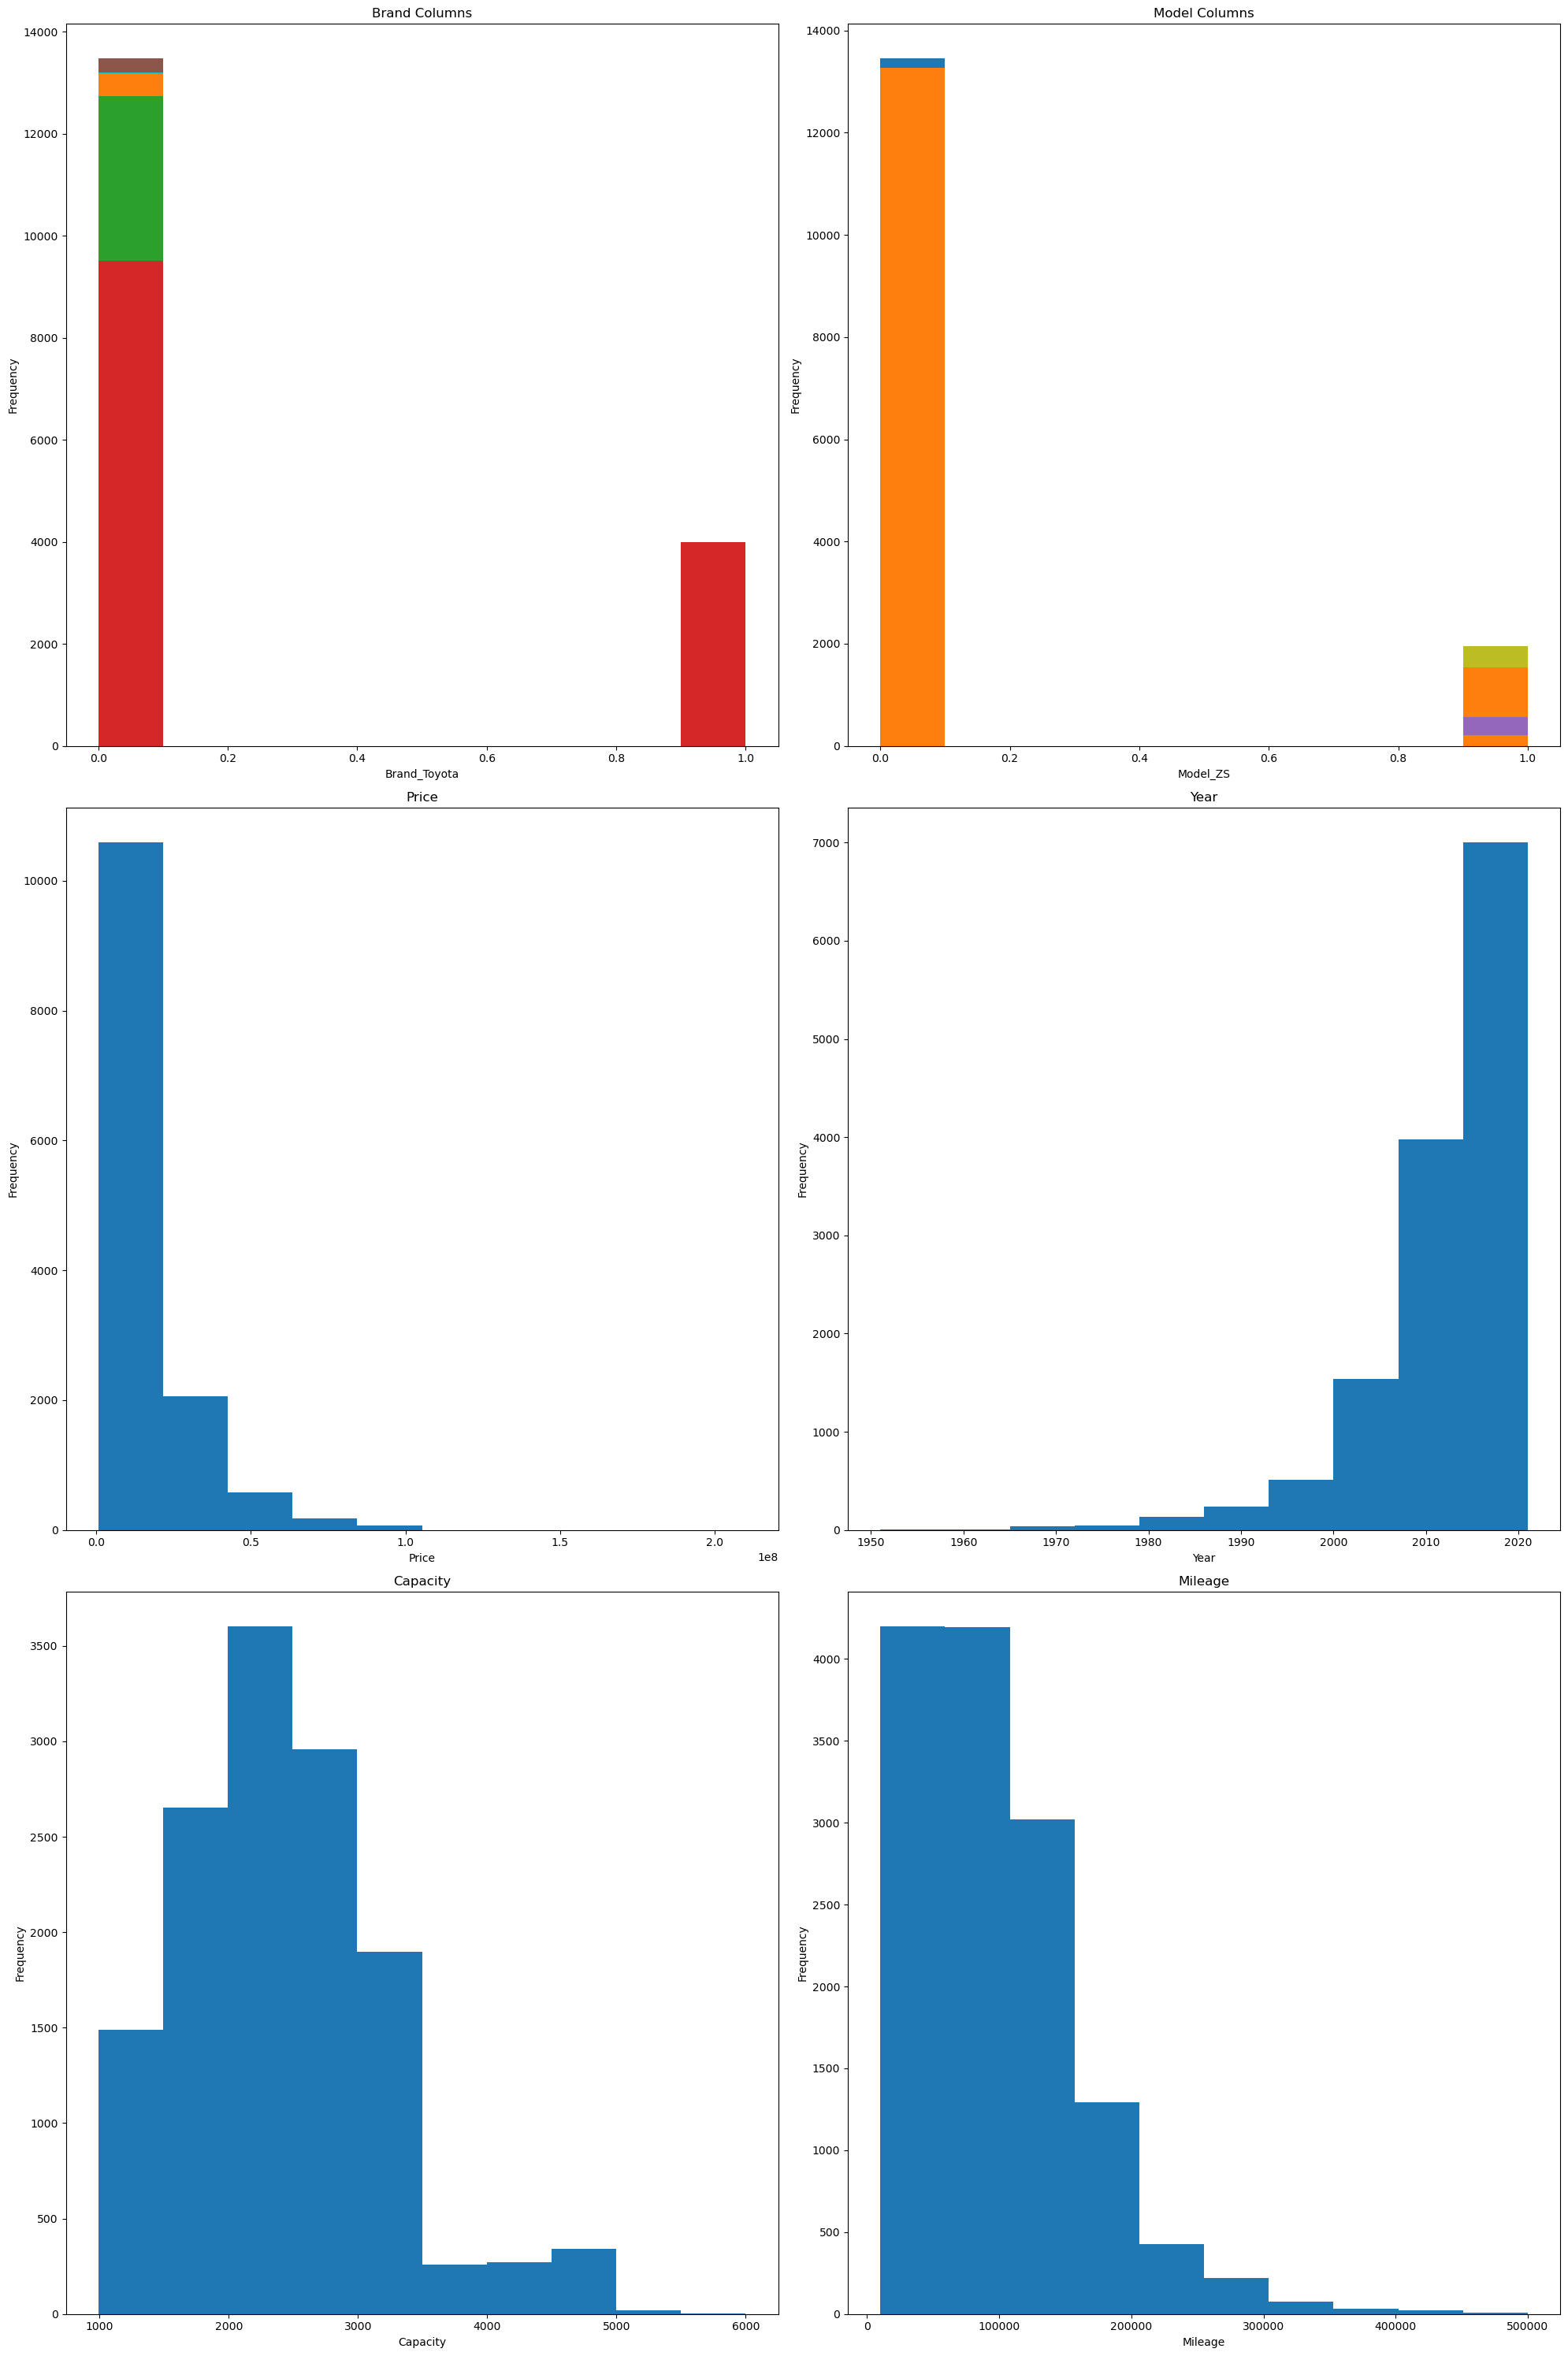

In [152]:
import matplotlib.pyplot as plt

# Separate columns starting with "Brand" and "Model"
brand_cols = [col for col in SUV.columns if col.startswith("Brand")]
model_cols = [col for col in SUV.columns if col.startswith("Model")]

# Create a figure with 5 subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 30))
axs = axs.flatten()

# Plot the histograms for the "Brand" columns
for i, col in enumerate(brand_cols):
    axs[0].hist(SUV[col])
    axs[0].set_title("Brand Columns")
    axs[0].set_xlabel(col)
    axs[0].set_ylabel("Frequency")

# Plot the histograms for the "Model" columns
for i, col in enumerate(model_cols):
    axs[1].hist(SUV[col])
    axs[1].set_title("Model Columns")
    axs[1].set_xlabel(col)
    axs[1].set_ylabel("Frequency")

# Plot the remaining histograms in the other subplots
for i, col in enumerate(SUV.columns):
        axs[i+2].hist(SUV[col])
        axs[i+2].set_title(col)
        axs[i+2].set_xlabel(col)
        axs[i+2].set_ylabel("Frequency")
        if i+2 == len(axs)-1:
            break

plt.tight_layout()
plt.show()


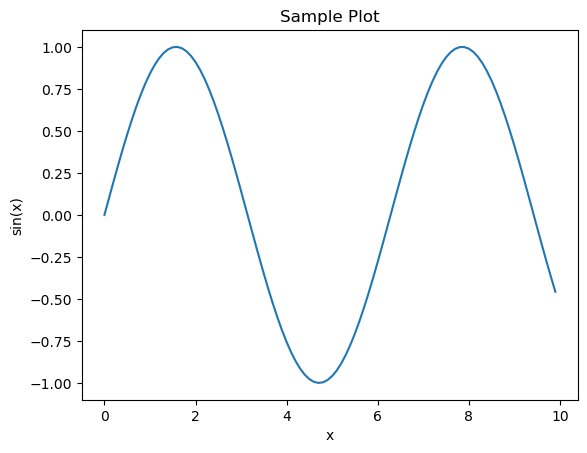

In [121]:
import numpy as np

# Generate some sample data
x = np.arange(0, 10, 0.1)
y = np.sin(x)

# Create a plot with labeled axes and a title
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sample Plot')

# Display the plot
plt.show()

# Encoding

In [122]:
# Do the one-hot encoding
SUV=pd.get_dummies(SUV)

In [123]:
# Preview data
SUV.head(50)

,Price,Year,Capacity,Mileage,Brand_BMW,Brand_Honda,Brand_Hyundai,Brand_Indian,Brand_Land Rover,Brand_Mercedes Benz,...,Model_Vitara,Model_Wrangler,Model_X-Trail,Model_X1,Model_X2,Model_X3,Model_X5,Model_Xenon,Model_Xpander,Model_ZS
0,12900000,2017,1500,37000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17000000,2020,1200,15000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13000000,2017,1200,21000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33500000,2015,2700,57000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14900000,2007,2700,120000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,19100000,2018,1500,37134,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9200000,2018,1000,60000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,19990000,2013,3200,110000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,12400000,2017,1200,37000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,20800000,2015,2500,92000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# View the shape of dataset after encoding
SUV.shape

(13487, 70)

# Model Building

In [125]:
# Select columns for X and Y axis
x= SUV.drop('Price',axis=1)
y= SUV['Price']

# Devide train and test data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape, x_test.shape

((10789, 69), (2698, 69))

In [126]:
# Function to check the model accuracy

def model_acc(model):
    model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    print(str(model)+ '---->' + str(accuracy))

### Linear Regression


In [127]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model_acc(lr)

LinearRegression()---->0.770475465605465


### Lasso Regression

In [130]:
from sklearn.linear_model import Lasso
ls=Lasso()
model_acc(ls)

Lasso()---->0.7704843452705978


### Decision Tree Regressor

In [131]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model_acc(dt)

DecisionTreeRegressor()---->0.894467220799083


### Random Forest Regressor

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_acc(rf)

RandomForestRegressor()---->0.9186531606476923


# Hyperparameter tunning

### Linear Regression


In [133]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept': [True, False],
              'n_jobs': [-1, 1, 2]}

grid_obj_lr = GridSearchCV(estimator=lr, param_grid=parameters)
grid_fit_lr = grid_obj_lr.fit(x_train, y_train)

In [134]:
best_model_lr = grid_fit_lr.best_estimator_
best_model_lr.score(x_test, y_test)

0.770475465605465

### Lasso Regression


In [135]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10],
              'fit_intercept': [True, False]}

grid_obj_ls = GridSearchCV(estimator=ls, param_grid=parameters)
grid_fit_ls = grid_obj_ls.fit(x_train, y_train)

In [136]:
best_model_ls = grid_fit_ls.best_estimator_
best_model_ls.score(x_test, y_test)

0.7705000973350011

### Decison Tree Regression 

In [137]:
from sklearn.model_selection import GridSearchCV


# specify hyperparameters and values to search
params = {'max_depth': [2, 4, 6, 8, 10],
          'min_samples_split': [2, 5, 10, 15, 20],
          'min_samples_leaf': [1, 2, 4, 8, 16]}

# create GridSearchCV object and fit to data
grid_obj_dt = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_fit_dt = grid_obj_dt.fit(x_train, y_train)


In [138]:
best_model_dt = grid_fit_dt.best_estimator_
best_model_dt.score(x_test, y_test)

0.8840308284920306

### Random Forest Regression

In [147]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj_rf = GridSearchCV(estimator=rf, param_grid=parameters)
grid_fit_rf = grid_obj_rf.fit(x_train, y_train)

In [148]:

best_model_rf = grid_fit_rf.best_estimator_
best_model_rf.score(x_test, y_test)

0.9164294300068018

# Predict

### Random Forest Regression

In [149]:
predict_price_rf = best_model_rf.predict(x_test)
predict_price_rf

array([36324500.        , 19340498.83809524, 20303466.66666666, ...,
        7302000.        , 48390000.00000001,  6837197.6984127 ])

In [150]:
from sklearn.metrics import r2_score


train_accuracy_rf = r2_score(y_test, predict_price_rf)
train_accuracy_rf

0.9164294300068018

## Save Model

In [ ]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(rf, file)

### Actual vs Predicted Values - Linear Regression

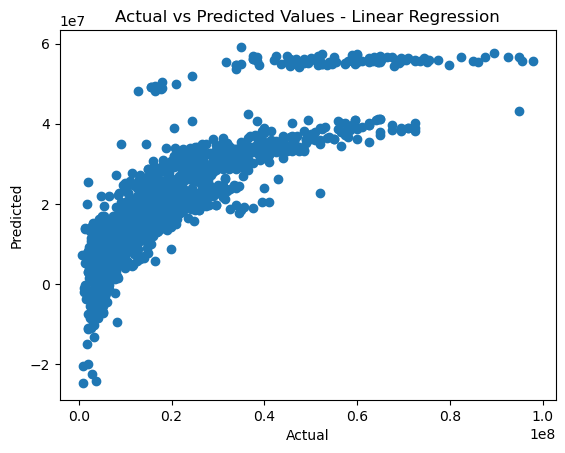

In [139]:
import matplotlib.pyplot as plt

# Get predicted values
y_pred = best_model_lr.predict(x_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values - Linear Regression')
plt.show()

### Lasso Regression: Actual vs Predicted values

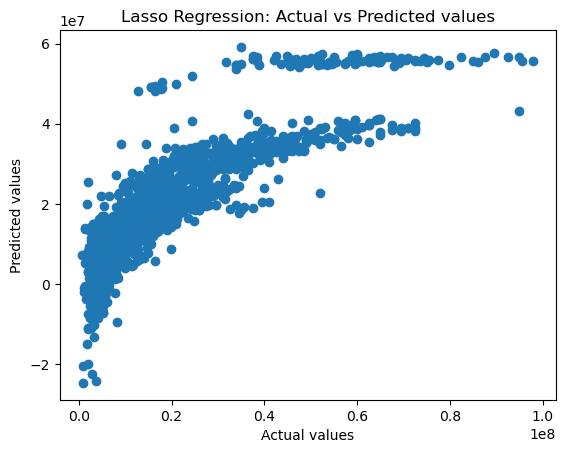

In [141]:
import matplotlib.pyplot as plt

# Predict values using the trained model
y_pred_ls = best_model_ls.predict(x_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_ls)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Lasso Regression: Actual vs Predicted values")
plt.show()

### Actual Prices vs Predicted Prices - Decision Tree

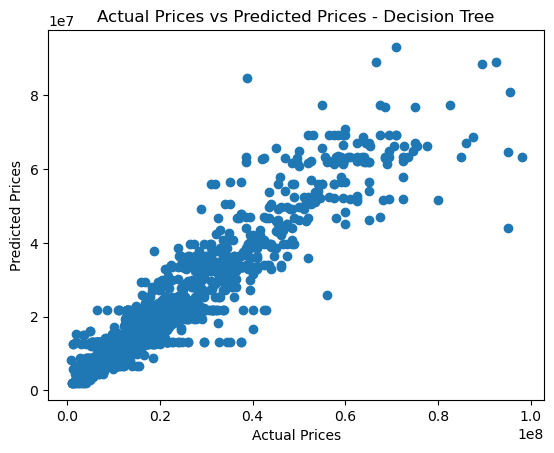

In [146]:
import matplotlib.pyplot as plt

# Predict values using the trained model
y_pred_dt = best_model_dt.predict(x_test)

plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices - Decision Tree")
plt.show()

### Actual vs Predicted  - Prices Random Forest Regression

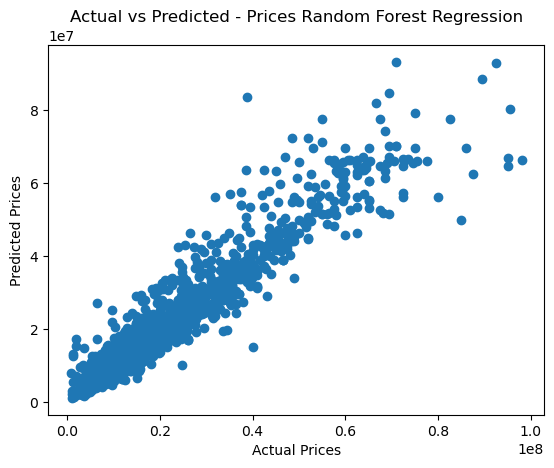

In [151]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predict_price_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted - Prices Random Forest Regression')
plt.show()